In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\kaaagle_Data\amazon_products_sales_data_cleaned.csv")
df.head()

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00


In [3]:
df.columns

Index(['product_title', 'product_rating', 'total_reviews',
       'purchased_last_month', 'discounted_price', 'original_price',
       'is_best_seller', 'is_sponsored', 'has_coupon', 'buy_box_availability',
       'delivery_date', 'sustainability_tags', 'product_image_url',
       'product_page_url', 'data_collected_at', 'product_category',
       'discount_percentage'],
      dtype='object')

In [4]:
x = df.drop(['product_title','product_category','product_image_url','product_page_url','data_collected_at'],axis=1)

In [5]:
x.isna().sum()

product_rating           1024
total_reviews            1024
purchased_last_month    10511
discounted_price         2062
original_price           2062
is_best_seller              0
is_sponsored                0
has_coupon                  0
buy_box_availability    14653
delivery_date           11983
sustainability_tags     39267
discount_percentage      2062
dtype: int64

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_rating        41651 non-null  float64
 1   total_reviews         41651 non-null  float64
 2   purchased_last_month  32164 non-null  float64
 3   discounted_price      40613 non-null  float64
 4   original_price        40613 non-null  float64
 5   is_best_seller        42675 non-null  object 
 6   is_sponsored          42675 non-null  object 
 7   has_coupon            42675 non-null  object 
 8   buy_box_availability  28022 non-null  object 
 9   delivery_date         30692 non-null  object 
 10  sustainability_tags   3408 non-null   object 
 11  discount_percentage   40613 non-null  float64
dtypes: float64(6), object(6)
memory usage: 3.9+ MB


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['is_best_seller', 'is_sponsored', 'has_coupon', 'buy_box_availability', 'delivery_date', 'sustainability_tags']:
	x[col] = le.fit_transform(x[col].astype(str))

In [11]:
x.head()

,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,discount_percentage
0,4.6,375.0,300.0,89.68,159.00,4,1,31,0,5,2,43.60
1,4.3,2457.0,6000.0,9.99,15.99,4,1,0,0,2,16,37.52
2,4.6,3044.0,2000.0,314.00,349.00,4,1,0,0,5,16,10.03
3,4.6,35882.0,10000.0,162.24,162.24,1,0,0,1,24,16,0.00
4,4.8,28988.0,10000.0,72.74,72.74,4,0,0,1,24,16,0.00


In [13]:
x.fillna(x.mean(),inplace=True)

In [15]:
x.isna().sum()

product_rating          0
total_reviews           0
purchased_last_month    0
discounted_price        0
original_price          0
is_best_seller          0
is_sponsored            0
has_coupon              0
buy_box_availability    0
delivery_date           0
sustainability_tags     0
discount_percentage     0
dtype: int64

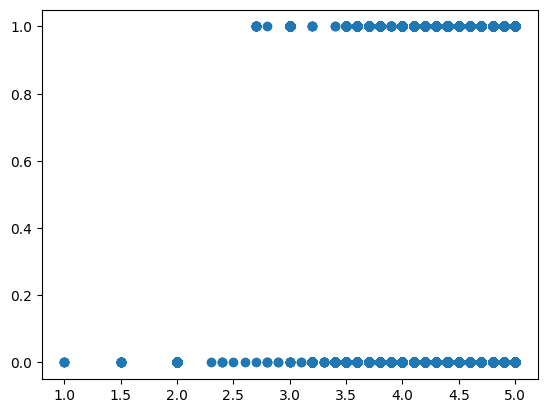

In [19]:
plt.scatter(x.product_rating,x.is_sponsored)

In [34]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(x)

<Axes: >

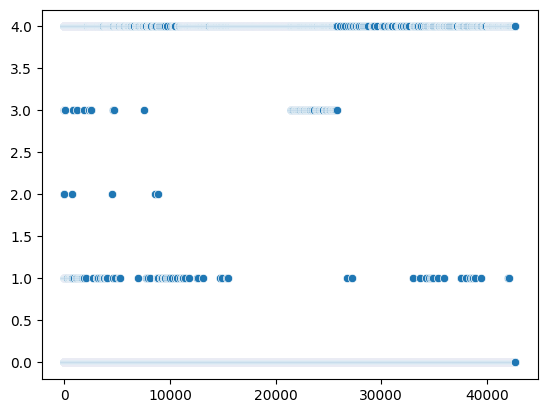

In [35]:
sns.scatterplot(y_pred)

In [26]:
x['Cluster'] = y_pred
x['Cluster'].value_counts()

Cluster
0    40880
2     1673
1      122
Name: count, dtype: int64

In [28]:
x.columns

Index(['product_rating', 'total_reviews', 'purchased_last_month',
       'discounted_price', 'original_price', 'is_best_seller', 'is_sponsored',
       'has_coupon', 'buy_box_availability', 'delivery_date',
       'sustainability_tags', 'discount_percentage', 'Cluster'],
      dtype='object')

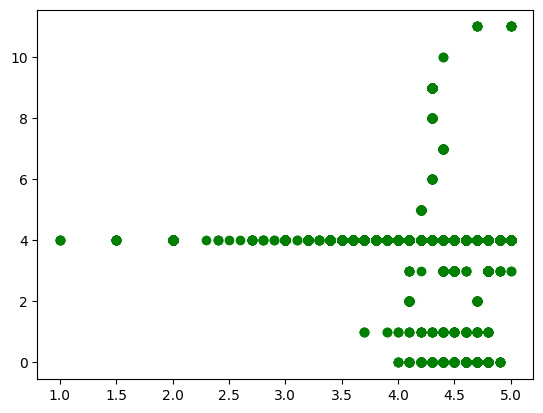

In [29]:
x1 = x[x['Cluster']==0]
x2 = x[x['Cluster']==1] 
x3 = x[x['Cluster']==2]
plt.scatter(x1.product_rating,x1.is_best_seller,color='green')

In [31]:
K = range(1,10)
wcss = []
for i in K:
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)    

In [32]:
wcss

[8374986905211.985,
 4836371513736.423,
 3263487712912.58,
 2232283314410.8257,
 1211597369080.4893,
 903682076236.8055,
 749473705819.3234,
 600220647025.5823,
 456560749589.55835]

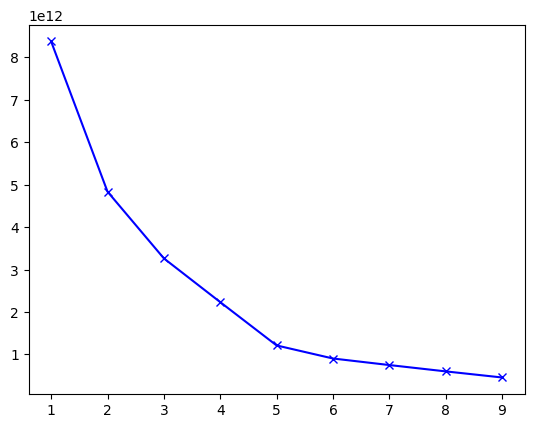

In [33]:
plt.plot(K,wcss,'bx-')

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)


In [38]:
x_pca.shape

(42675, 2)

<Axes: >

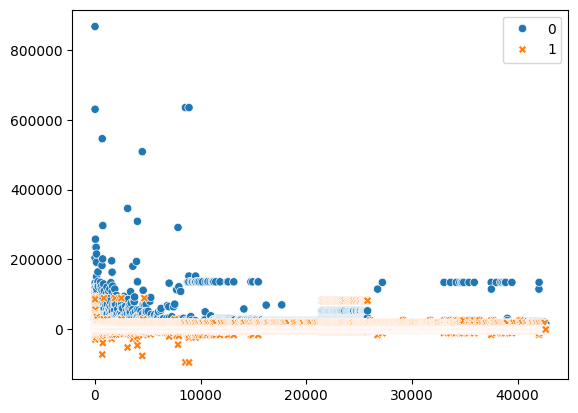

In [39]:
sns.scatterplot(x_pca)

In [41]:
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(x_pca)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], shape=(42675,), dtype=int32)

In [44]:
km = range(1,10)
wcss = []   
for i in km:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)

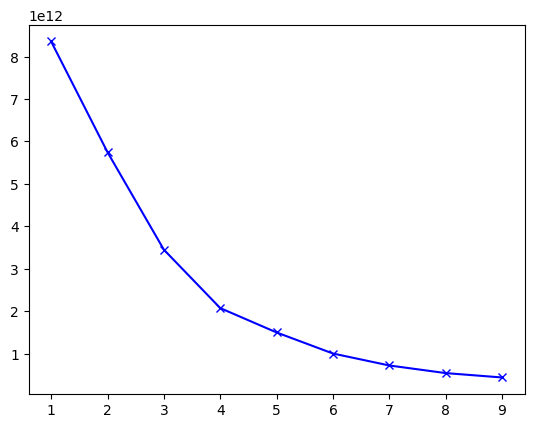

In [46]:
plt.plot(km,wcss,'bx-')

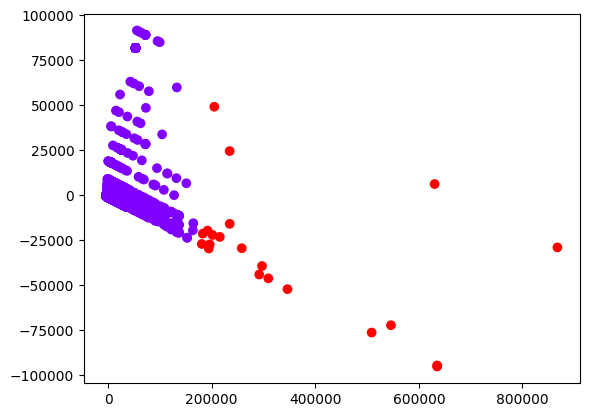

In [47]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_kmeans,cmap='rainbow')